GSAPP PLA6113 <br>
Wednesday, March 31st, 2021<br>
Exploring Urban Data with ML <br> 
Erik Strand


# Decision Trees and Ensmeble Methods

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Decision Trees
Resource: https://scikit-learn.org/stable/modules/tree.html#tree-classification

# (1) Decision Tree Classifier
### Load breast cancer dataset
* ['data'] is features (predictors)
* ['target'] is the two classes of the breast cancer (0=malignant, 1=benign)

In [2]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

In [3]:
print (cancer['data']) # X
print (cancer['feature_names'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
print (cancer['target'][:25]) # y
print (cancer['target_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
['malignant' 'benign']


### Load DecisionTreeClassifier module
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [5]:
from sklearn.tree import DecisionTreeClassifier

### Split train and test dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], 
                                                    stratify=cancer.target, random_state=42)

### Build your initial decision tree model (with all default setting from sklearn)

    < Syntax >
    Classifiation problem: YOUR_MODEL_NAME = DecisionTreeClassifier()
    Regression problem: YOUR_MODEL_NAME = DecisionTreeRegressor()
    
Here we are building a classification model (whether breast cancer or not).

In [8]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Train and test score

In [9]:
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

1.0
0.9370629370629371


As expected, the accuracy on the training set is 100%—because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data. The test set accuracy is slightly worse than for the linear models we looked at previously, which had around 95% accuracy.

### Improve your model - parameter tuning
You can tune the following parameters.
* max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure
* min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model

If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data. Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. 

### Let's set _max_depth = 4_
This means only four consecutive questions can be asked. 
Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.


In [10]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)

print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

0.9882629107981221
0.951048951048951


### Visualizing the decision tree
The visualization of the tree provides a great in-depth view of how the algorithm makes predictions, and is a good example of a machine learning algorithm that is easily explained to nonexperts

[Text(576.0529411764707, 489.24, 'X[20] <= 16.795\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(324.95294117647063, 380.52000000000004, 'X[27] <= 0.136\ngini = 0.161\nsamples = 284\nvalue = [25, 259]'),
 Text(177.24705882352941, 271.8, 'X[10] <= 1.048\ngini = 0.031\nsamples = 252\nvalue = [4, 248]'),
 Text(118.16470588235295, 163.08000000000004, 'X[14] <= 0.003\ngini = 0.024\nsamples = 251\nvalue = [3, 248]'),
 Text(59.082352941176474, 54.360000000000014, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(177.24705882352941, 54.360000000000014, 'gini = 0.016\nsamples = 247\nvalue = [2, 245]'),
 Text(236.3294117647059, 163.08000000000004, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(472.6588235294118, 271.8, 'X[21] <= 25.62\ngini = 0.451\nsamples = 32\nvalue = [21, 11]'),
 Text(354.49411764705883, 163.08000000000004, 'X[24] <= 0.179\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(295.4117647058824, 54.360000000000014, 'gini = 0.18\nsamples = 10\nvalue = [1, 9]'),


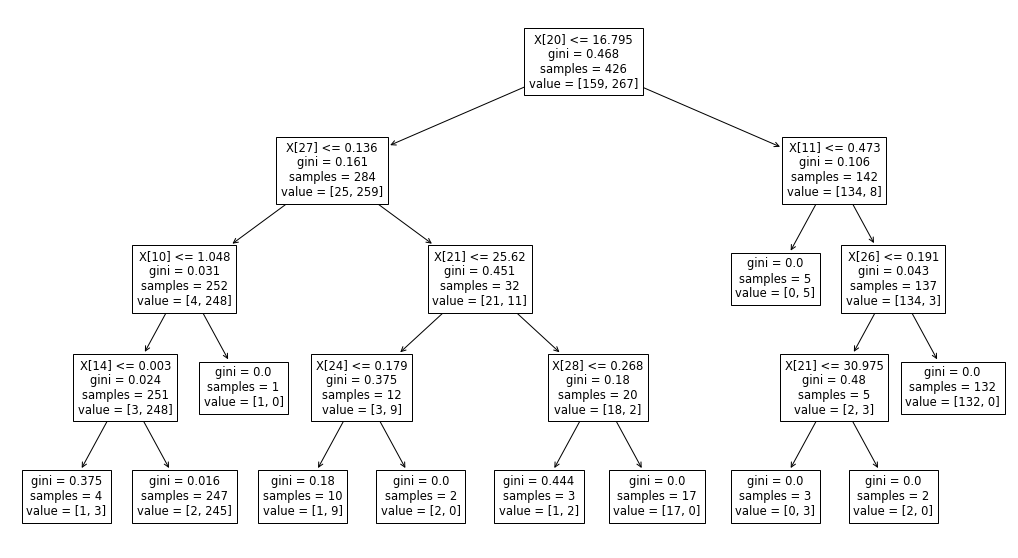

In [11]:
from sklearn import tree
plt.figure(figsize=(18,10))
tree.plot_tree(clf.fit(X_train, y_train)) 

### Feature importance
Rating how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0
means “not used at all” and 1 means "perfectly predicts the target". The feature importances always sum to 1.

In [12]:
print ("Feature importances: ")
print (clf.feature_importances_)
print (cancer.feature_names)

Feature importances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Text(0, 0.5, 'Feature')

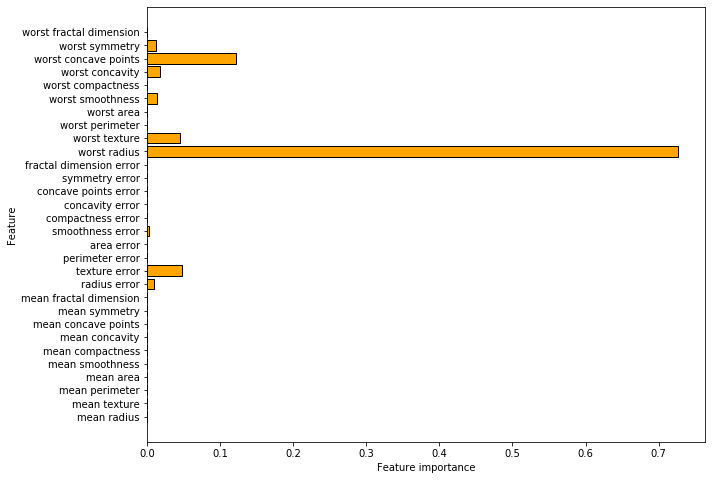

In [13]:
n_features = cancer.data.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_features), clf.feature_importances_, align='center', color='orange', edgecolor='k')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

# (2) Decision Tree Regressor
### Load Boston housing data
__About data__<br>
Sklearn provides example datasets for exercise purposes. For more information, please check https://scikit-learn.org/stable/datasets/index.html <br>

__Boston Housing dataset__ (506 samples and 13 derived features)


* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town
* CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per USD10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - percentage lower status of the population
* MEDV - Median value of owner-occupied homes in USD1000’s (*Our target variable*)



In [14]:
from sklearn.datasets import load_boston 
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

print (df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Split train and test dataset

In [15]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=0)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

Train sample (X): 379
Train sample (y): 379
Test sample (X): 127
Test sample (y): 127


### Load Decision Tree Regressor module
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.predict

In [16]:
from sklearn.tree import DecisionTreeRegressor

### Build and train Decision Tree Regressor model
The parameters that control model complexity in decision trees are the pre-pruning parameters that stop the building of the tree before it is fully developed. Setting either max_depth, max_leaf_nodes, or min_samples_leaf—is sufficient to prevent overfitting. __You should try this parameter tuning process for your project if using related algorithms!__

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
reg = DecisionTreeRegressor(criterion='mse', max_depth=4)         
reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [19]:
print (reg.score(X_train,y_train))
print (reg.score(X_test,y_test))

0.8969642511553902
0.6473815046222302


### Feature importance

In [20]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print('Mean squared error (train set): %.2f'% mean_squared_error(y_train, y_train_pred))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, y_test_pred))

Mean squared error (train set): 8.79
Mean squared error (test set): 28.81


In [21]:
print ("Feature importances: ")
print (reg.feature_importances_)
print (df.columns.tolist()[:-1])

Feature importances: 
[0.02655355 0.         0.0065439  0.         0.00555833 0.24476897
 0.00524899 0.02248851 0.         0.         0.01972177 0.00304978
 0.66606621]
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


Text(0, 0.5, 'Feature')

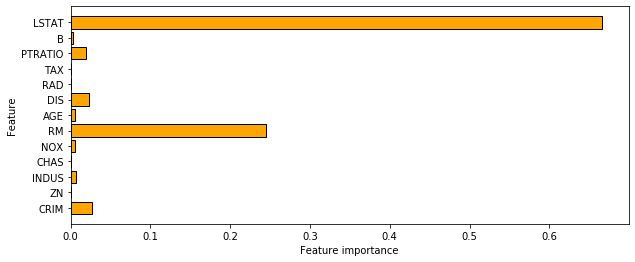

In [22]:
n_features = len(df.columns.tolist()[:-1])
plt.figure(figsize=(10,4))
plt.barh(range(n_features), reg.feature_importances_, align='center', color='orange', edgecolor='k')
plt.yticks(np.arange(n_features), df.columns.tolist()[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")

# 2. Random Forests
# (1) Random Forest Classifier 

### Load the breast cancer dataset and split train/test data

In [23]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], 
                                                    stratify=cancer.target, random_state=0)

### Load Random Forest Classifier module
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [24]:
from sklearn.ensemble import RandomForestClassifier

### Build and train your initial decision tree model (with all default setting from sklearn)

    < Syntax >
    Classifiation problem: YOUR_MODEL_NAME = RandomForestClassifier()
    Regression problem: YOUR_MODEL_NAME = RandomForestRegressor()
    
Here we are building a classification model (whether breast cancer or not).

In [25]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Train/test score

In [26]:
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

0.9976525821596244
0.9440559440559441


The random forest gives us an accuracy of 96% (test set), better than the linear models or a single decision tree, without tuning any parameters. We could adjust the max_features setting, or apply pre-pruning as we did for the single decision tree. However, often the default parameters of the random forest already work quite well. But you should consider the following parameters.
* n_estimators: The number of trees in the forest.
* max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* max_features: The number of features to consider when looking for the best split. If none, the default is sqrt(n_features)
* max_leaf_nodes: Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity.
* min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.
* n_jobs: The number of jobs to run in parallel. None means 1. -1 means using all the cores in your computer.

### Feature importance
Similarly to the decision tree, the random forest provides feature importances, which are computed by aggregating the feature importances over the trees in the forest.

In [27]:
print ("Feature importances: ")
print (clf.feature_importances_)
print (cancer.feature_names)

Feature importances: 
[0.02969122 0.01720923 0.06929807 0.04112995 0.00500449 0.00636883
 0.08056202 0.09200666 0.00435231 0.0042842  0.02136349 0.00420529
 0.01354811 0.02303752 0.00288949 0.00593161 0.00468708 0.0027883
 0.003081   0.00229185 0.12542246 0.01704882 0.19536571 0.0743788
 0.00948886 0.0086519  0.02172119 0.10149821 0.00399358 0.00869974]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Text(0, 0.5, 'Feature')

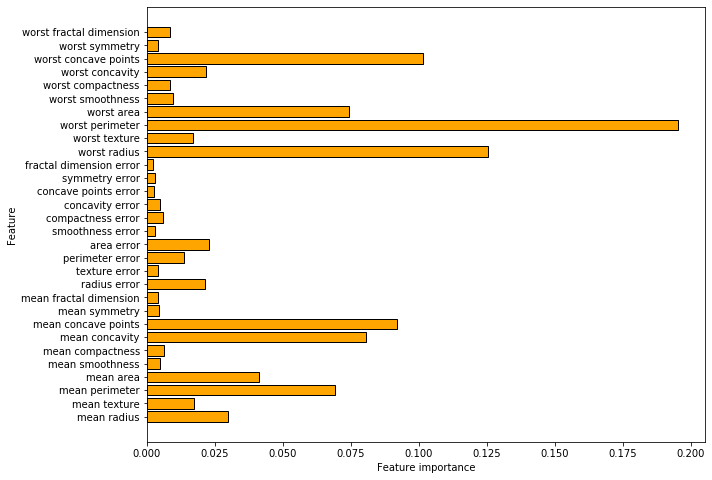

In [28]:
n_features = cancer.data.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_features), clf.feature_importances_, align='center', color='orange', edgecolor='k')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")